In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter data for Data Analyst data

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [12]:
# create a new column for month number

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# explode the job_skills column and pivot

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,4,1,3,0,2,0,1,1,1,0,0,3,0,0,0,1,2,0,0,1,1,0,1,0,0,0,0,3,0,0,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,1,0,1,0,0,1,1,0,0,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,1,1,0,2,0,1,3,0,1,1,2,1,1,1,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,1,0,2,2,0,2,2,1,0,0,2,3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,2,0,2,2,3,1,0,0,0,0,3,0,1,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,1,2,3,1,0,0,0,2,0,1,1,0,0,0,0,0,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,1,0,2,0,0,0,1,0,3,2,0,0,2,0,0,1,0,1,1,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,3,2,0,0,1,0,0,2,3,1,0,1,3,0,1,1,1,0,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,1,0,0,0,0,3,0,0,0,0,2,0,0,2,2,0,0,2,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Top 5 Skills for Data Analysts per month')

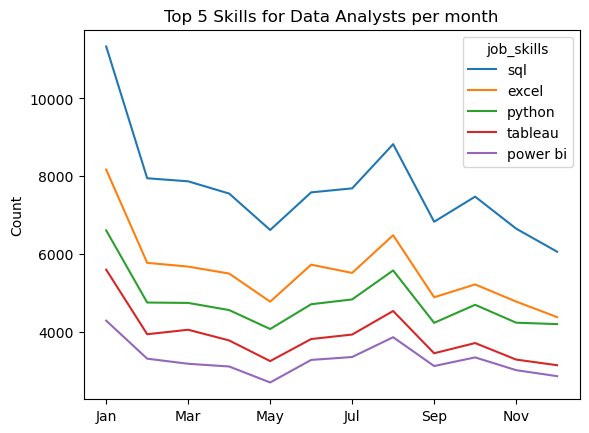

In [16]:
# Use the month names for plotting.

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.ylabel('Count')
plt.xlabel('')
plt.title('Top 5 Skills for Data Analysts per month')

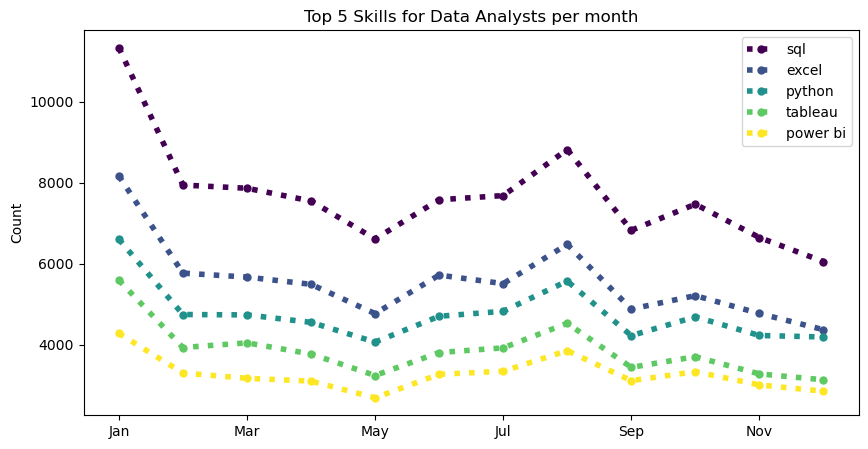

In [20]:
# Now we gonna format the plot for it to look more concise.

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,  # specify the line width using this args
    linestyle=':', # options are: '-', '--' - break line plot, '-.' - combo of dash and dot, ':' - dotted line
    colormap='viridis',
    marker='o', # will give dots on the line. options: 'o', 'x', '+', '*', 'S', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10,5) # changes the plot fig size for it to look much bigger for further understanding.
)

plt.ylabel('Count')
plt.xlabel('')
plt.title('Top 5 Skills for Data Analysts per month')
plt.legend().set_visible(True)

plt.show()

# Customizing our Scatter Plot we made in last exercise.

In [45]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [46]:
# explode the job_skills into individual rows
df_exploded = df.explode('job_skills')

# calculate the avg salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count =  ('job_skills', 'count')  # here skill_count is new column name. count here is to perform a task of count here.   
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


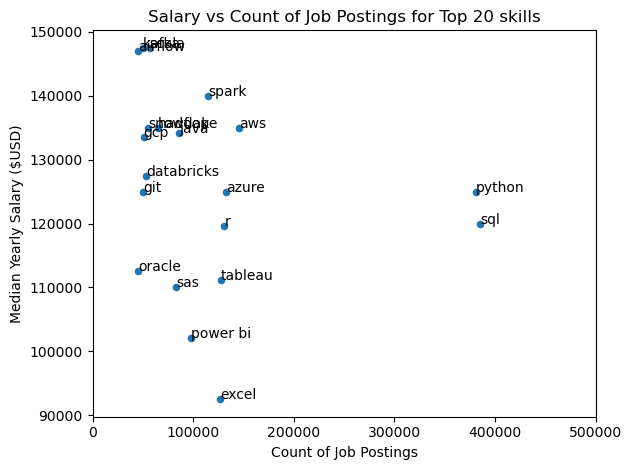

In [47]:
# we can see the overlappin with our usual basic plotting method

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 20 skills')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlim(0, 500000)
plt.show()

In [48]:
# need to import a new function from adjustText module

from adjustText import adjust_text

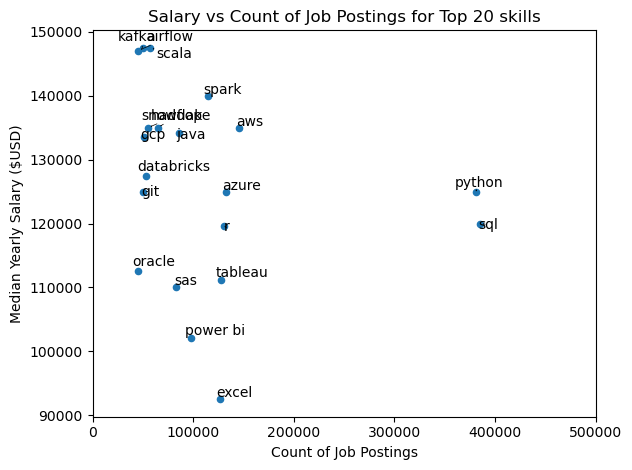

In [52]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 20 skills')
plt.tight_layout()

texts = [] # we need to create a list of values which need adjusting for this we need to append it inside the for loop.
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='k', lw=0.5))

plt.xlim(0, 500000)
plt.show()

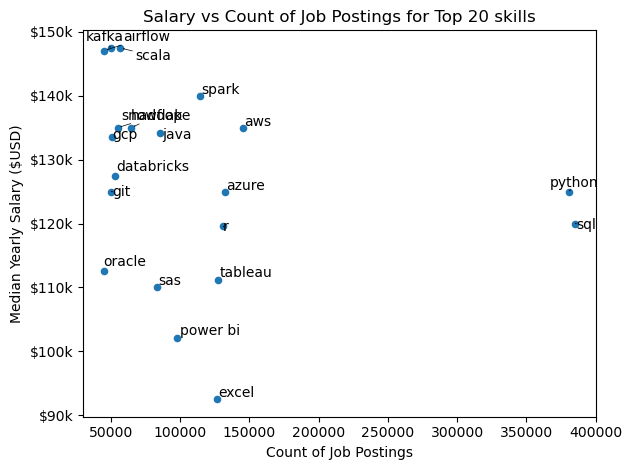

In [59]:
# to modify the values in the y-axis to make it much easier to understand we need to use ticker func.

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 20 skills')
plt.tight_layout()

texts = [] # we need to create a list of values which need adjusting for this we need to append it inside the for loop.
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='k', lw=0.5))

plt.xlim(30000, 400000)
plt.show()